In [18]:
import argparse
from torch import nn
from torch.optim import Adam

from lstm import LSTM
from music_dataloader import create_split_loaders
from torch_utils import setup_device
from train_eval_utils import *

import torch
from torch import nn
from torch.autograd import Variable

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})


In [12]:
computing_device = setup_device()
train_loader, val_loader, test_loader, dictionary = create_split_loaders(100)

CUDA is supported


In [13]:
def sample_lstm(dictionary, n_layers = 100, sample_len = 100, model_path='models/lstm.pt', start_char = '<start>', temperature = 1):
    
    out_list = []
    heatmap = []

    # Load Model
    model = LSTM(len(dictionary), n_layers, len(dictionary), computing_device, 1)
    model.load_state_dict(torch.load(model_path))
    model.eval()
    model.reset_state()
    
    #Init Starting Sample
    current_sequence_input = torch.zeros(1, 1, len(dictionary))
    current_sequence_input [0,0,dictionary.class_to_index[start_char]]=1
    current_sequence_input = current_sequence_input.to(computing_device)
    
    out_list.append(start_char)
#     heatmap.append(model.h_0)

    
    for i in range(sample_len):
        
        output = model(current_sequence_input)
        heatmap.append(model.h_0.detach().cpu().numpy().reshape(-1))

        probabilities = nn.functional.softmax(output.div(temperature), dim=2)
        prob = probabilities.data.cpu().numpy().flatten().astype('float64')
        prob = prob / prob.sum()
        out_ind = np.argmax(np.random.multinomial(1, prob, size=1)[0])
        out_list.append(dictionary.index_to_class[out_ind])

        current_sequence_input = torch.zeros(1, 1, len(dictionary))
        current_sequence_input [0,0,out_ind]=1
        current_sequence_input = current_sequence_input.to(computing_device)
    
    return out_list, heatmap

In [14]:
outlist, heatmap = sample_lstm(dictionary, n_layers = 75, sample_len=1000, model_path='model_75/lstm_75_250.pt', temperature = 0.8)
heatmap = np.asarray(heatmap)

In [15]:
def generate_music(outlist):
    s = ""
    for e in outlist:
        s += e
    return s

In [25]:
def generate_heatmaps(outlist, heatmap):
    lst = outlist[:225]
    lst = np.reshape(lst, (15, 15))
    
    for i in range(10):
        a = heatmap[:,i][:225]
        a = a.reshape((15, 15))

        fig, ax = plt.subplots()
        ax = sns.heatmap(a, annot = lst, fmt='', linewidths=1,cmap="RdYlBu_r")

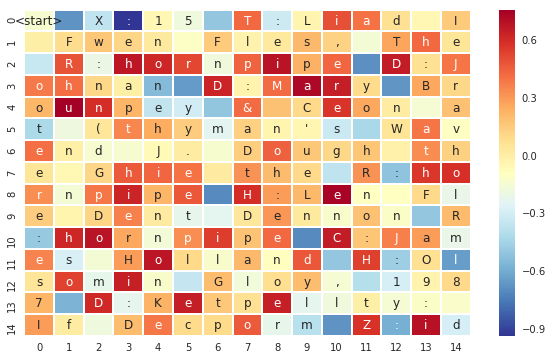

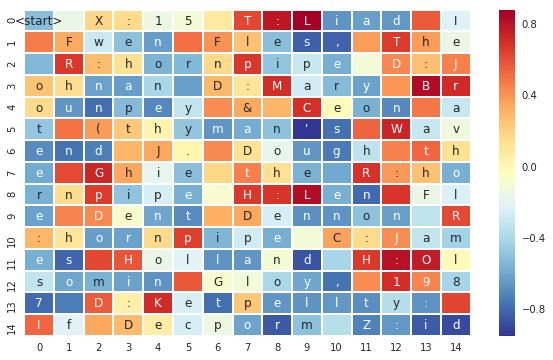

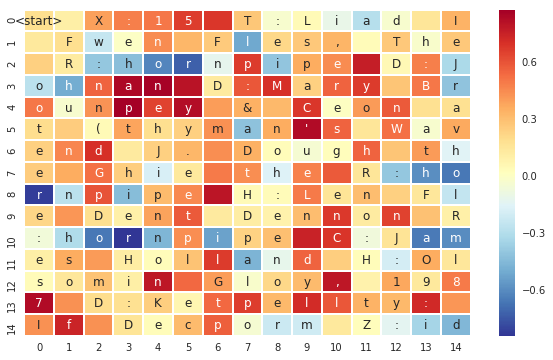

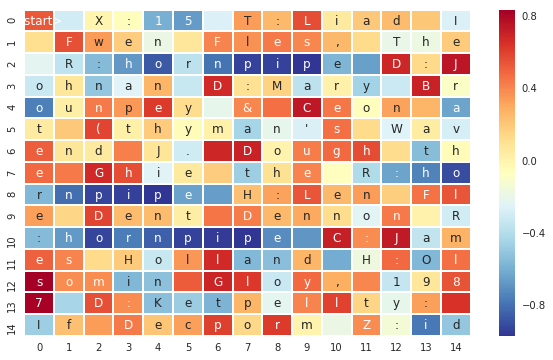

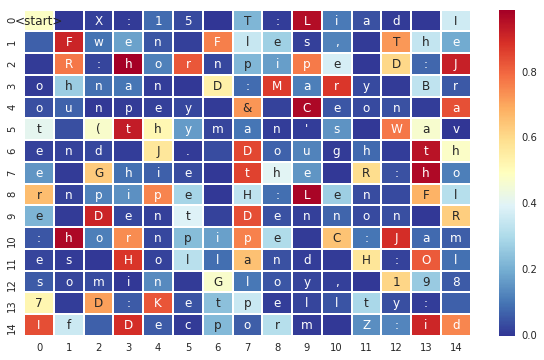

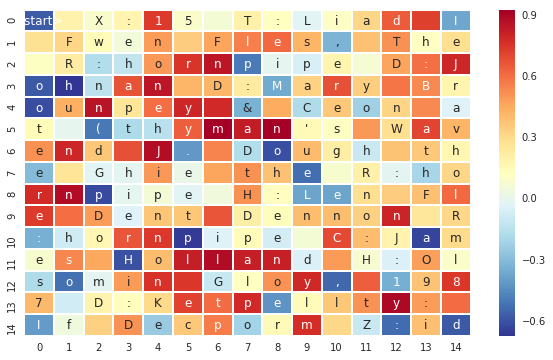

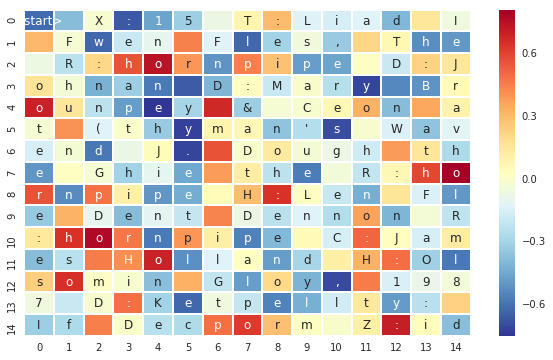

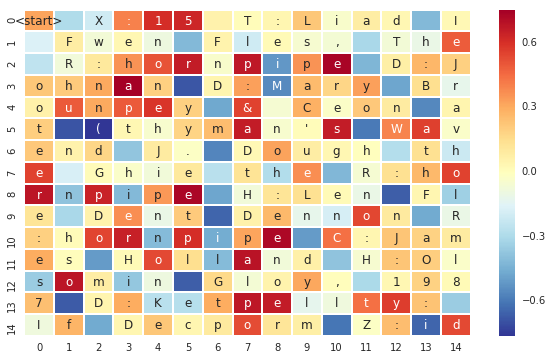

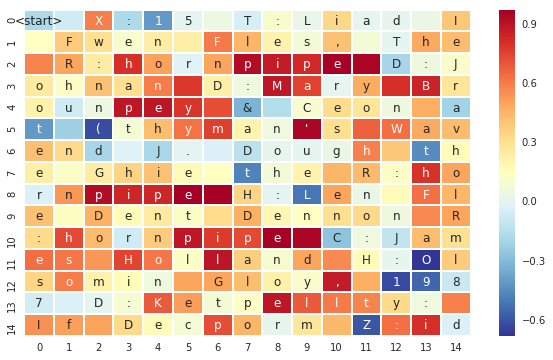

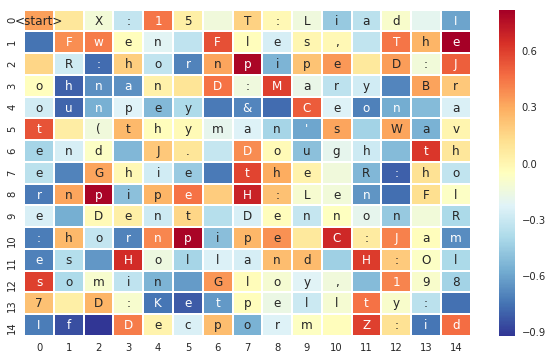

In [26]:
generate_heatmaps(outlist, heatmap)

In [ ]:
lst = ['ST', 'NL', 'X', ':', '5', 'NL', 'T', ':', 'O', "'", 'i', 'g', 'u', 'r', 's', 'NL', 'R', ':', 'h', 'o', 'r', 'n', 'p', 'i', 'p', 'e', 'NL', 'C', ':', 'M', 'a', 'r', 'y', ' ', 'A', "'", 'O', 'S', 'F', ',', ' ', 'T', 'h', 'e', 'NL', 'R', ':', 'h', 'o', 'r', 'n', 'p', 'i', 'p', 'e', 'NL', 'H', ':', 'A', 'l', 'i', 'n', ' ', 'i', 'n', ' ', 'F', 'r', 'o', 't', 'h', '"', ' ', 'S', 'e', 'g', ' ', 'a', 'n', 'd', ' ', 'H', 'h', 's', 't', 'e', 'd', 'g', 'n', 'o', 'n', 'NL', 'Z', ':', 'i', 'd', ':', 'h', 'n', '-', 'h', 'o', 'r', 'n', 'p', 'i', 'p', 'e', '-', '5', '5', 'NL', 'M', ':', 'C', '|', 'NL', 'K', ':', 'G', 'NL', 'B', 'c', '|', 'd', 'e', 'f', 'e', ' ', 'd', 'B', 'A', 'B', '|', 'd', 'e', 'f', 'e', ' ', 'c', 'A', 'G', 'B', '|', 'A', 'c', 'B', 'd', ' ', 'e', '2', 'f', 'g', '|', 'a', 'g', 'f', 'e', ' ', 'g', 'e', 'd', 'c', '|', 'd', '2', ' ', '(', '3', 'B', 'c', 'd', ' ', 'f', 'e', 'd', 'B', '|', 'NL', 'c', 'd', 'e', 'f', ' ', 'e', 'd', 'B', 'A', '|', 'G', 'F', 'D', 'E', ' ', 'F', 'D', 'F', 'A', '|', 'B', 'A', 'B', 'd', ' ', 'd', 'B', 'G', 'B', '|', 'A', '2', 'F', 'A', ' ', 'F', '2', ':', '|', 'NL', 'EN', 'NL', 'ST', 'NL', 'X', ':']
lst = np.reshape(lst, (15, 15))

/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


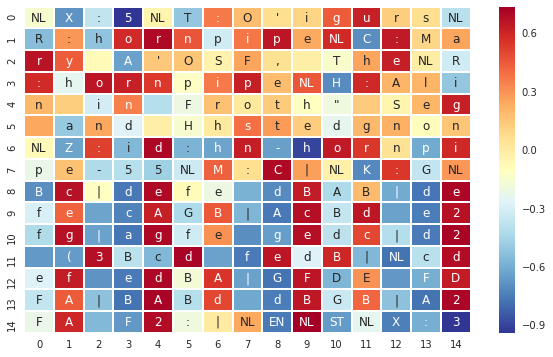

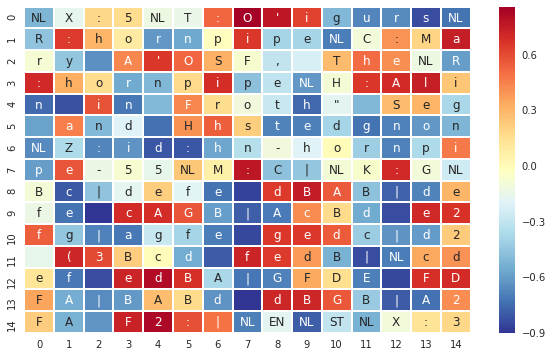

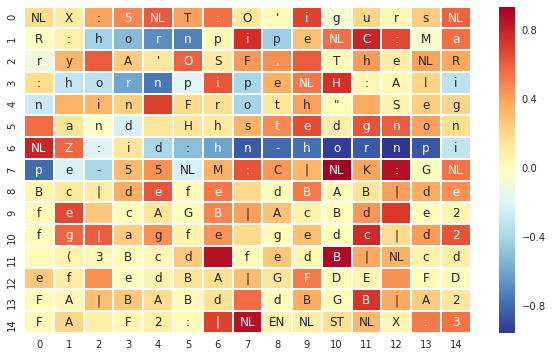

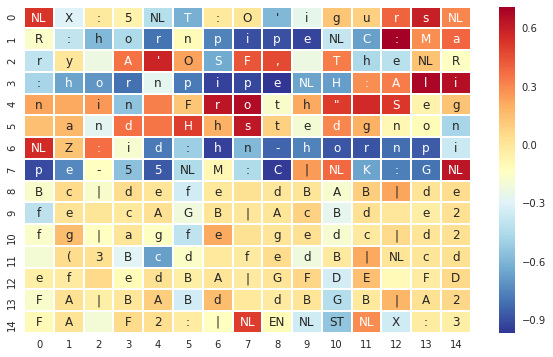

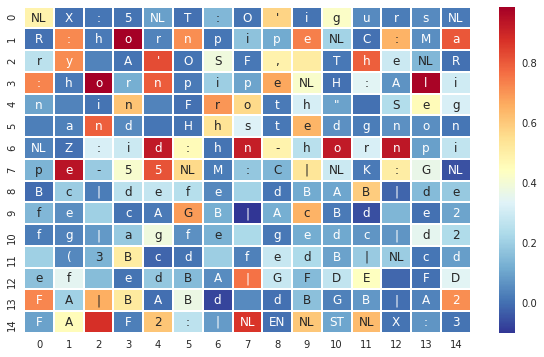

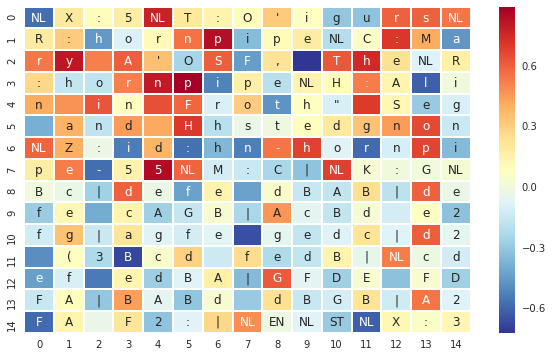

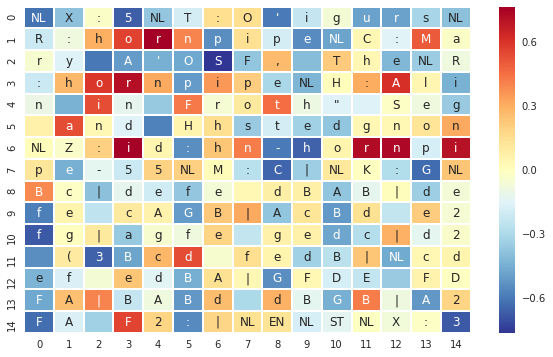

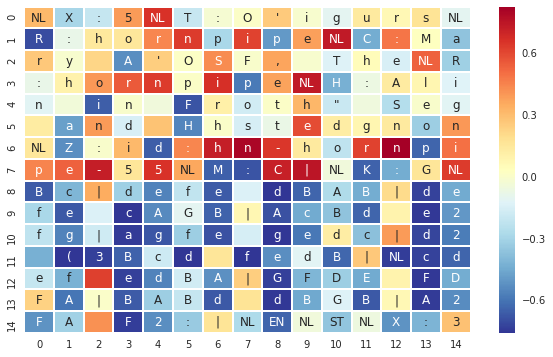

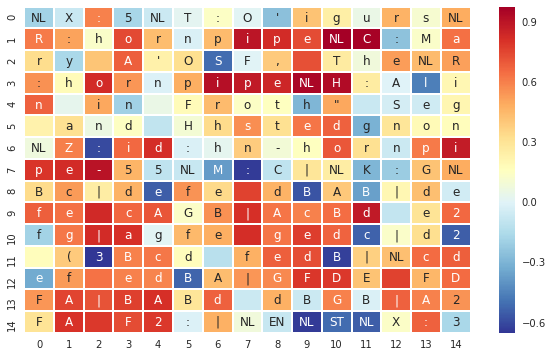

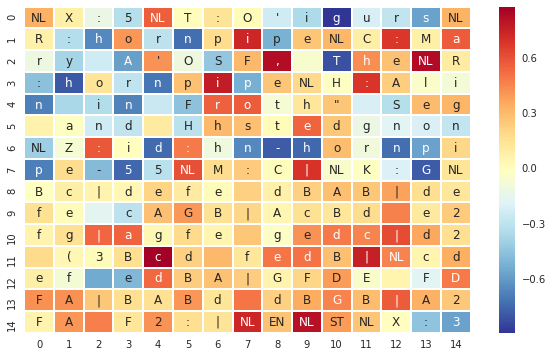

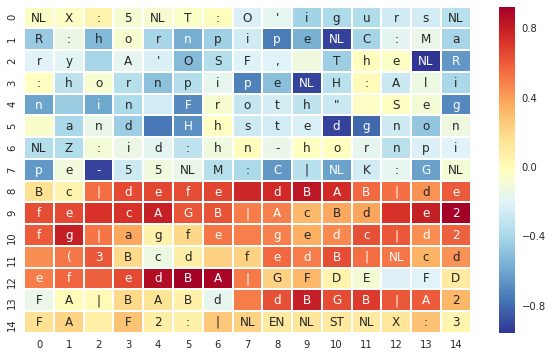

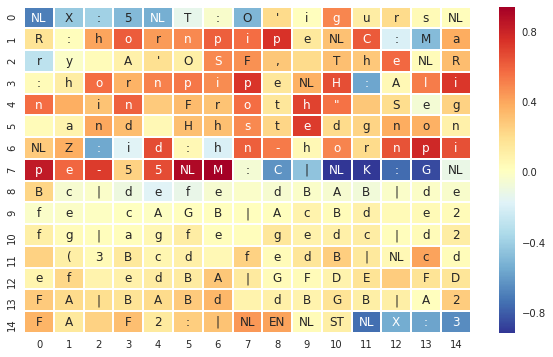

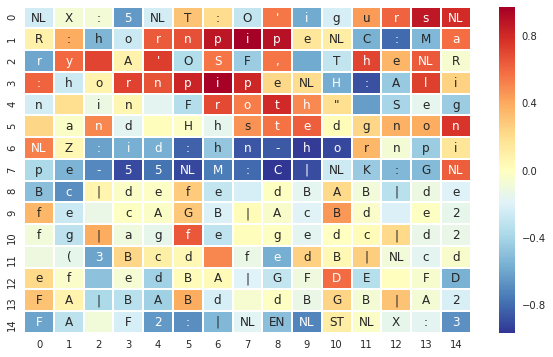

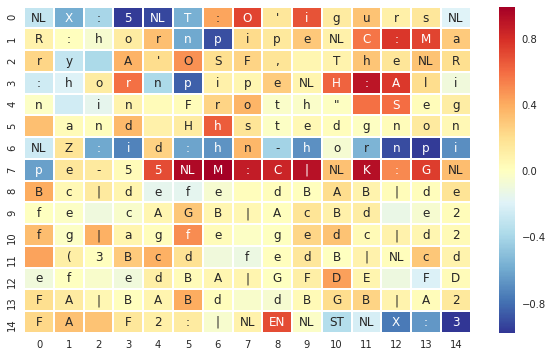

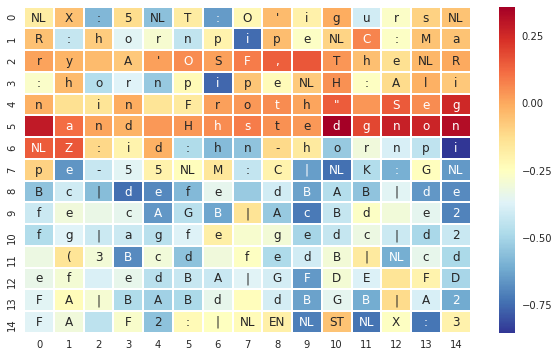

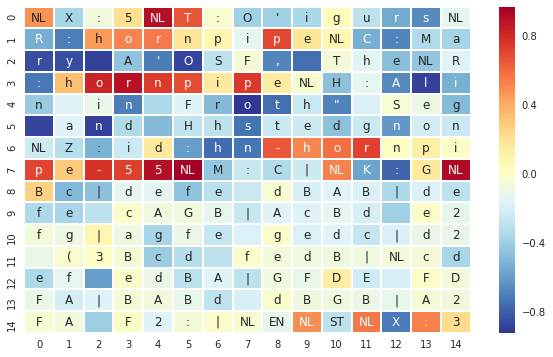

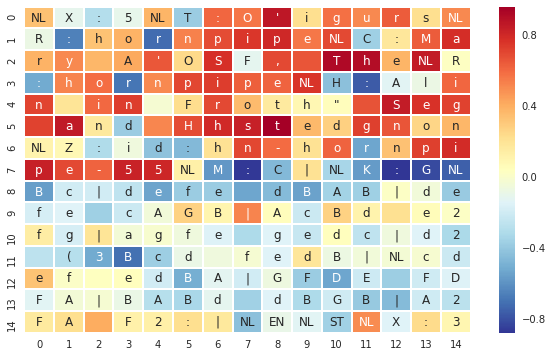

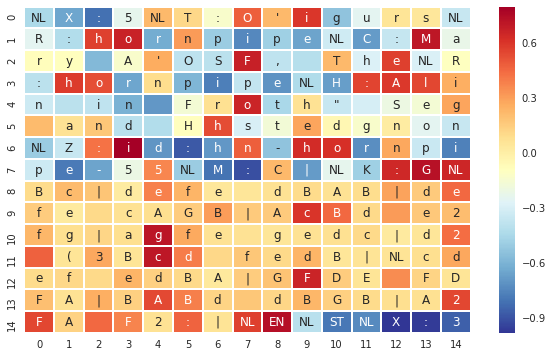

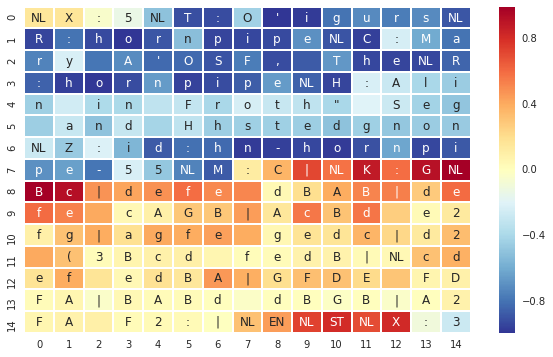

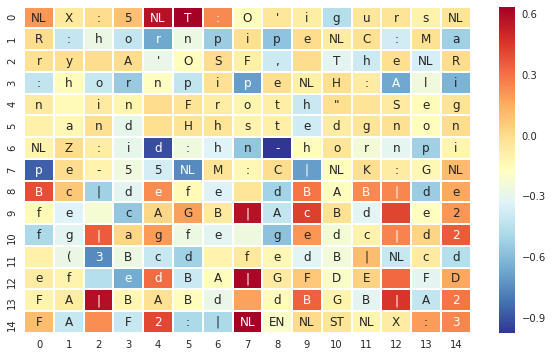

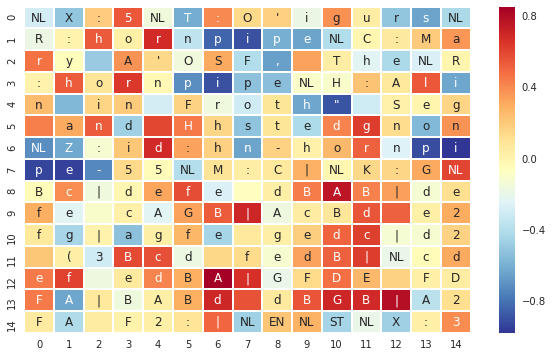

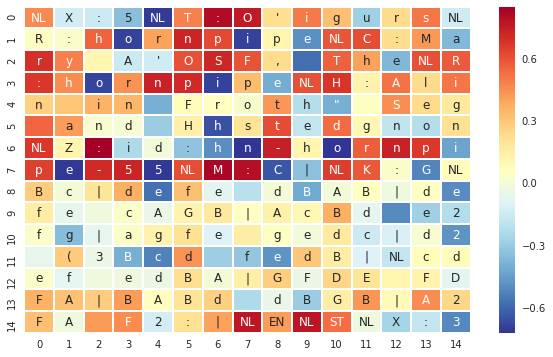

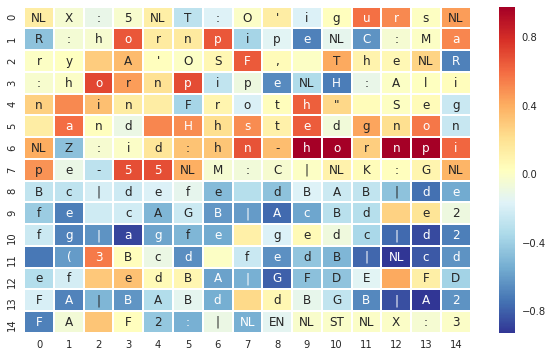

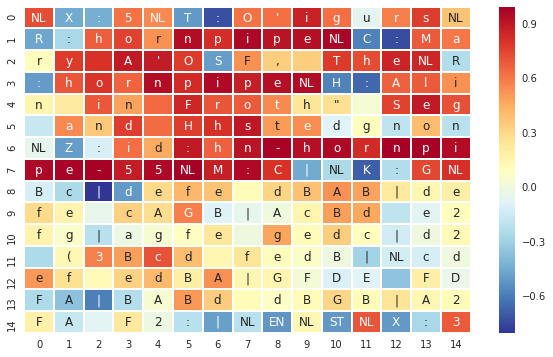

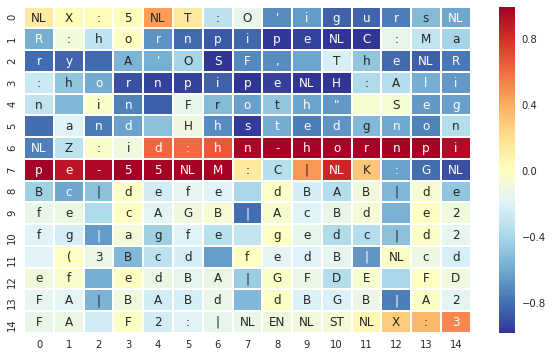

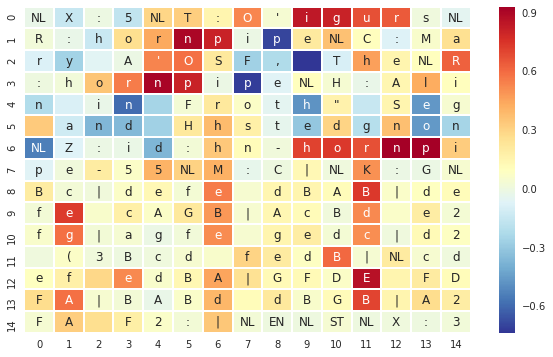

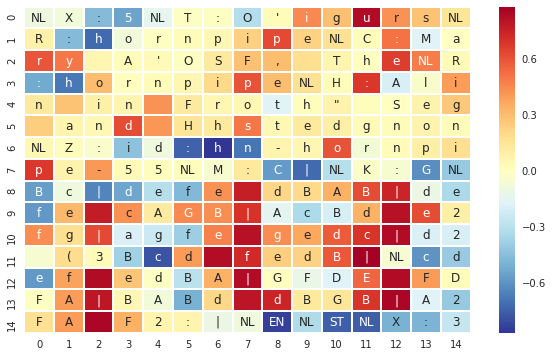

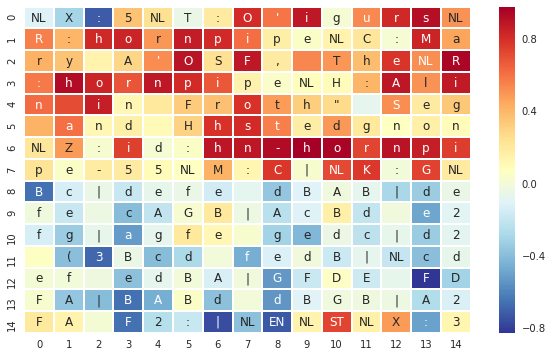

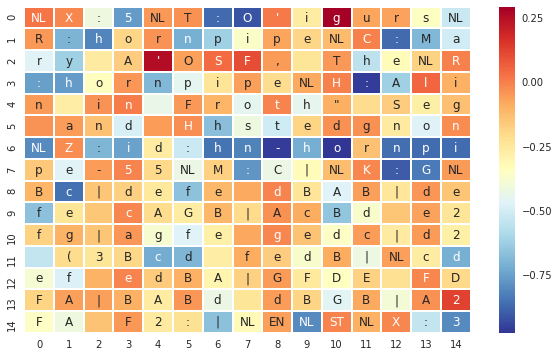

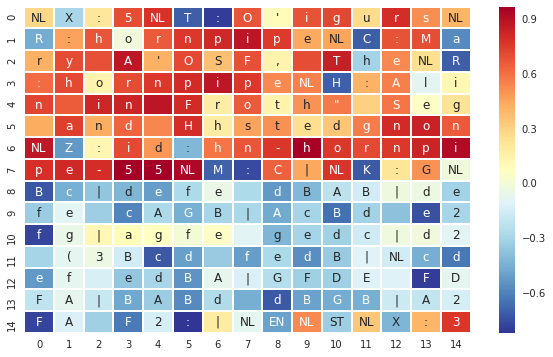

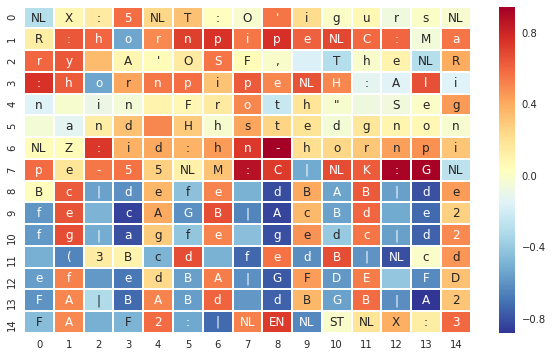

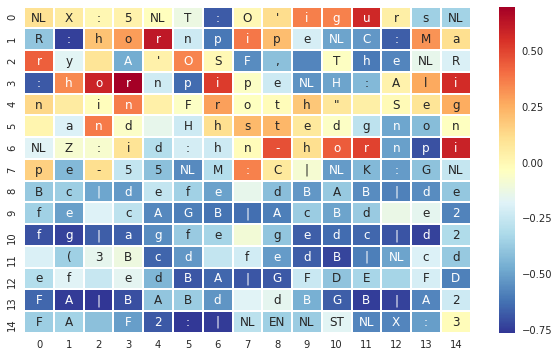

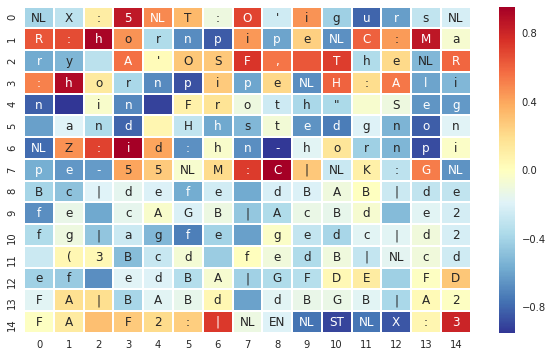

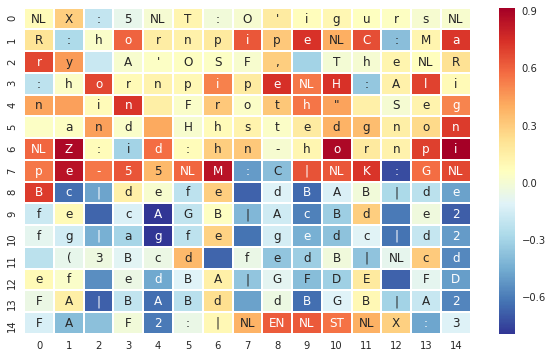

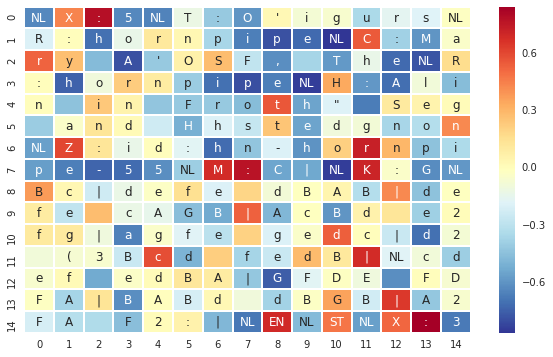

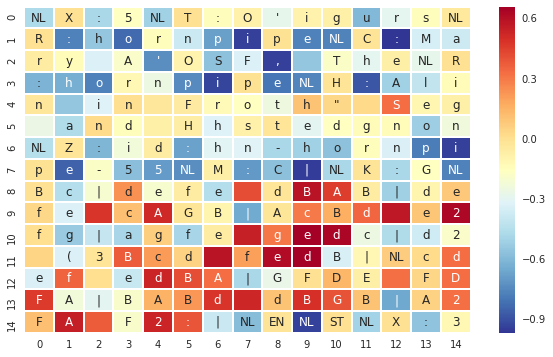

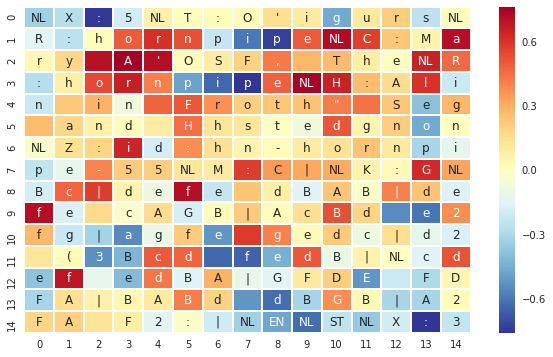

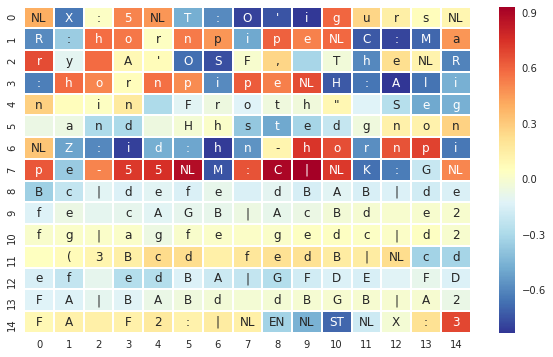

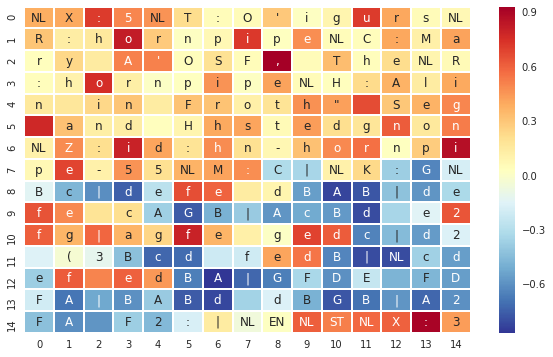

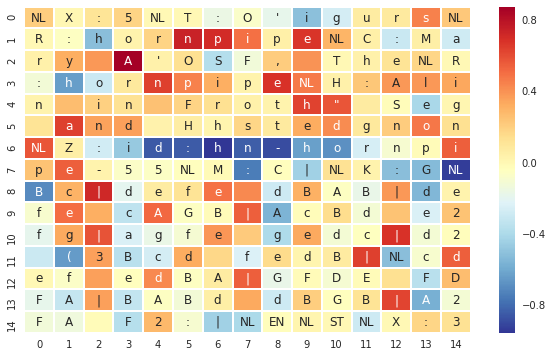

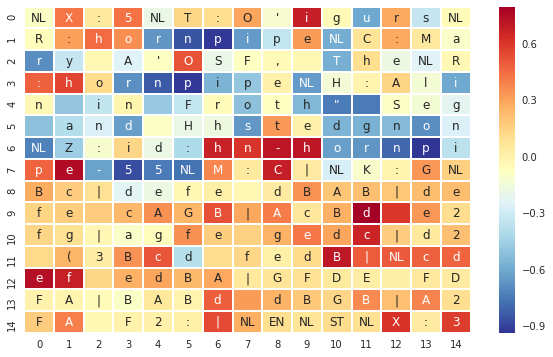

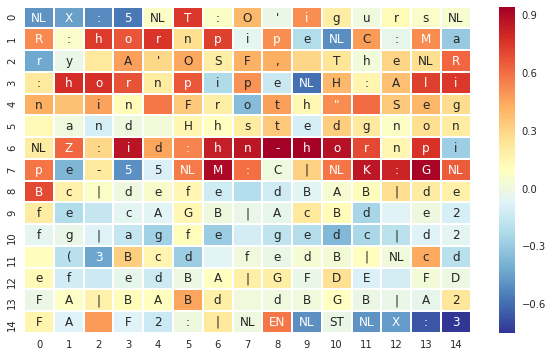

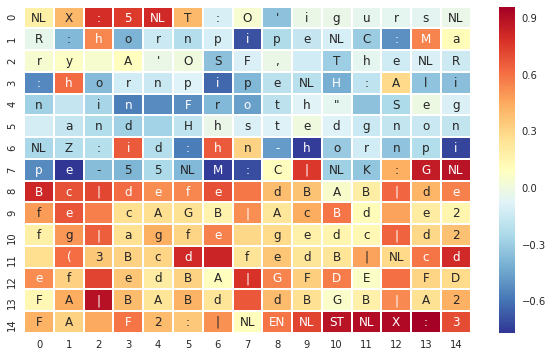

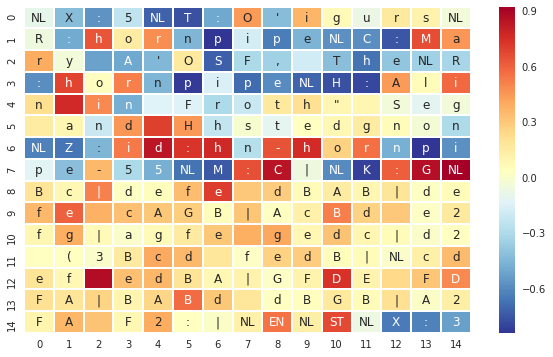

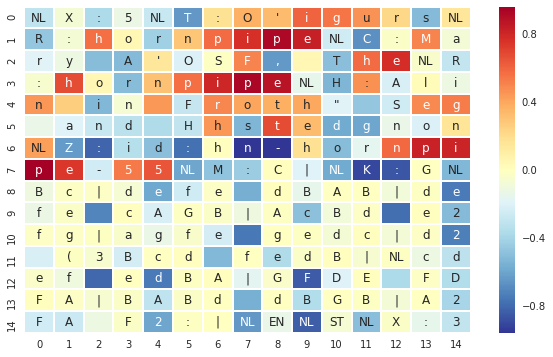

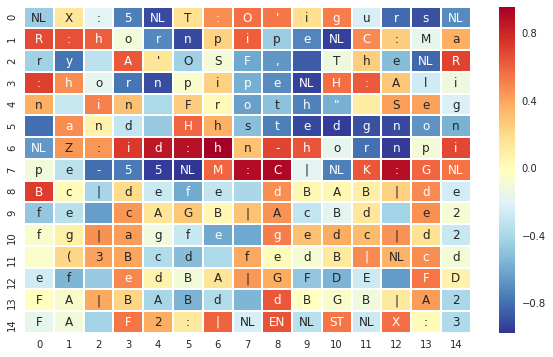

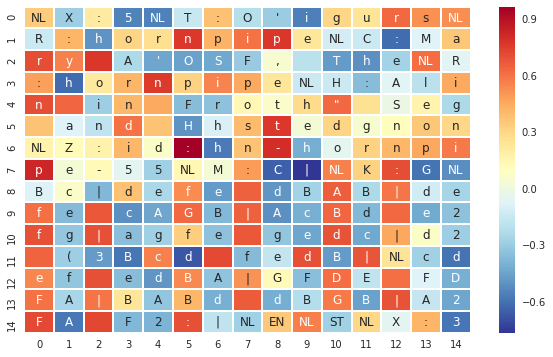

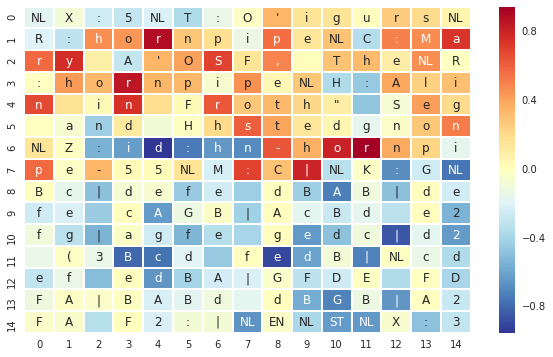

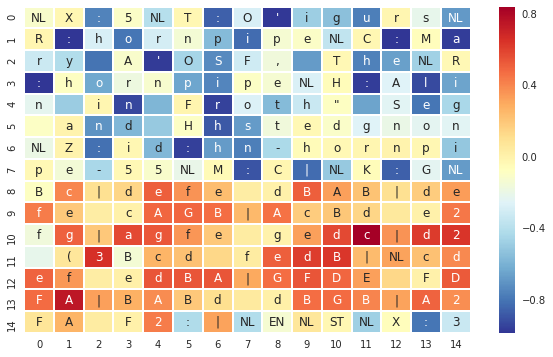

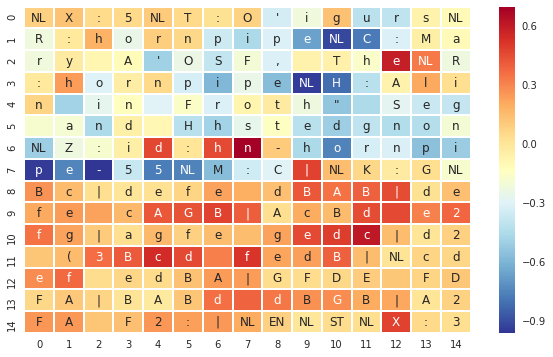

In [148]:
def generate_heatmaps(outlist, heatmap):
    lst = outlist[:225]
    lst = np.reshape(lst, (15, 15))
    
    for i in range(50):
        a = heatmap[:,i][:225]
        a = a.reshape((15, 15))

        fig, ax = plt.subplots()
        ax = sns.heatmap(a, annot = lst, fmt='', linewidths=1,cmap="RdYlBu_r")